# 宏观地理分布分析

目标：

1. 统计分析省份/城市的地理标志产品数量

2. 展示不同地理标志产品的地理分布

3. 统计分析省份/城市地理标志产品的多样性

In [1]:
import os
import json
from src import *

# 绘图输出目录
figures_save_dir = "figures"
os.makedirs(figures_save_dir, exist_ok=True)

# 读取产品数据
products_file_path = "../data/tokenized_products.json"
products = json.load(open(products_file_path, 'r', encoding='utf-8'))


## 统计分析

统计分析每个省份/城市的地理标志产品数量。

从结果可以看出:

+ 产品最多的省份是四川省，有388个产品

+ 产品最少的省份是天津市，有16个产品。

+ 产品最多的城市是成都市，有70个产品

前5个省份地理标志产品数量: [('四川省', 388), ('湖北省', 333), ('山东省', 309), ('广西壮族自治区', 232), ('广东省', 208)]
后5个省份地理标志产品数量: [('宁夏回族自治区', 51), ('海南省', 48), ('北京市', 22), ('上海市', 21), ('天津市', 16)]
前5个城市地理标志产品数量: [('成都市', 70), ('重庆市', 65), ('黄冈市', 62), ('青岛市', 48), ('十堰市', 48)]
后5个城市地理标志产品数量: [('果洛藏族自治州', 1), ('克拉玛依市', 1), ('临高县', 1), ('新余市', 1), ('鄂州市', 1)]
柱状图已保存至: figures\地理标志产品地理分布柱状图.png


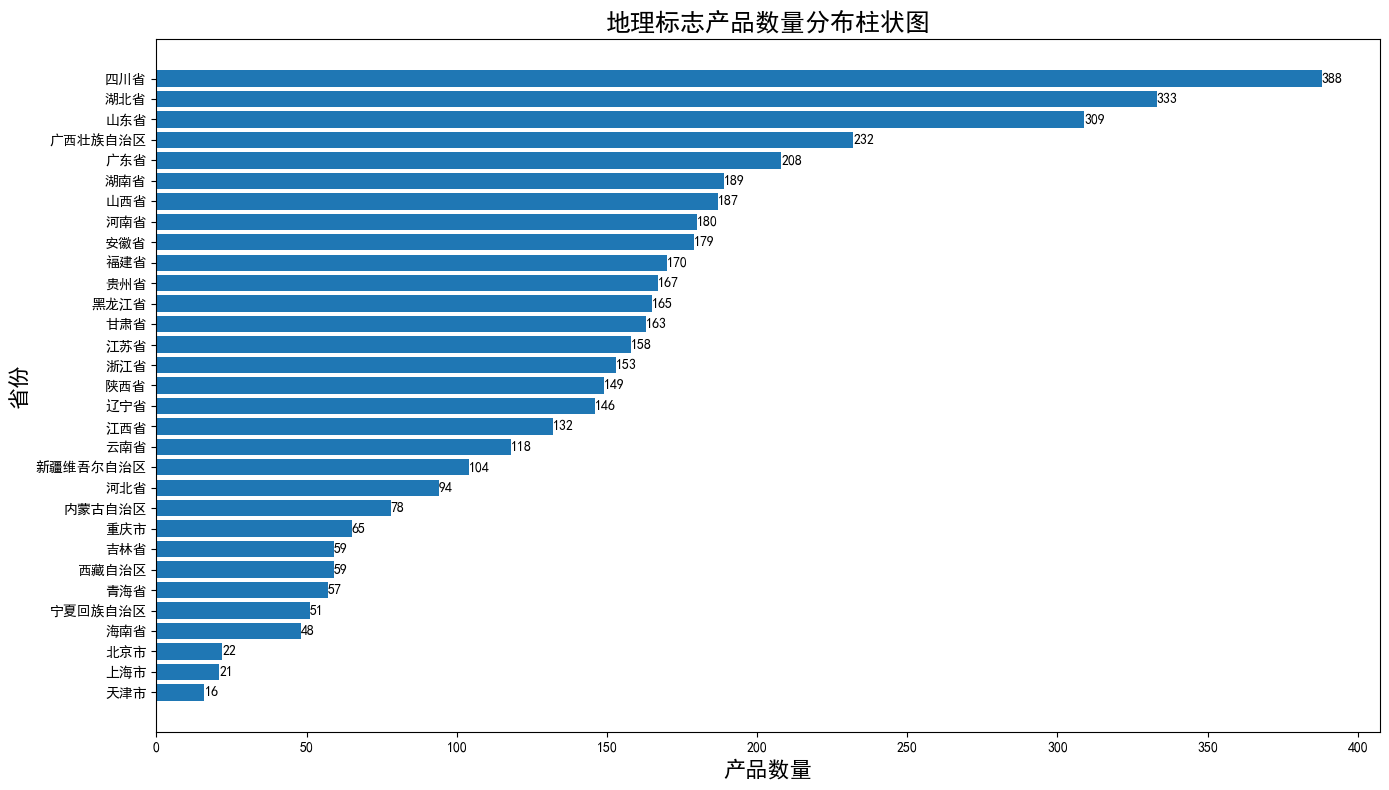

In [2]:
# 统计省份级产品
province_products_count = products_count_province_level(products)
print("前5个省份地理标志产品数量:", province_products_count[:5])
print("后5个省份地理标志产品数量:", province_products_count[-5:])

# 统计城市级产品
city_products_count = products_count_city_level(products)
print("前5个城市地理标志产品数量:", city_products_count[:5])
print("后5个城市地理标志产品数量:", city_products_count[-5:])

# 绘制柱状图
province_bar_plot(province_products_count[::-1], os.path.join(figures_save_dir, "地理标志产品地理分布柱状图.png"))


## 地理分布可视化

针对热门类别的产品（例如大米、水果）, 以热力图的形式展示其在不同**省份**的分布情况。

下面先分析哪一些产品比较多：

In [3]:
product_name_NN_token_count(products)[:20]

[('茶', 147),
 ('大米', 110),
 ('苹果', 65),
 ('西瓜', 62),
 ('葡萄', 61),
 ('猪', 56),
 ('核桃', 54),
 ('小米', 54),
 ('酒', 52),
 ('花生', 47),
 ('辣椒', 47),
 ('鸡', 46),
 ('马铃薯', 35),
 ('羊肉', 34),
 ('蜂蜜', 34),
 ('山羊', 32),
 ('绿茶', 31),
 ('大蒜', 31),
 ('梨', 31),
 ('米', 30)]

可以看到，出现次数前20的产品名称分词为

```
茶、大米、苹果、西瓜、葡萄
猪、核桃、小米、 酒、 花生
辣椒、鸡、马铃薯、羊肉、蜂蜜
山羊、绿茶、大蒜、梨、米
```

接着以热力图的形式，分析这些产品在不同省份的分布情况。

In [4]:
# 出现次数前10的产品名称分词
name_list = [
    "茶", "大米","苹果", "西瓜", "葡萄", 
    "猪", "核桃","小米", "酒", "花生", 
    "辣椒", "鸡", "马铃薯","羊肉","蜂蜜",
    "山羊","绿茶","大蒜","梨","米"
]

# 用于绘制省级热力图的字典
heatmap_dict = {"地理标志产品数量": province_products_count}
heatmap_dict.update({
    name: name_in_product_name_count_provice_level(products, name) for name in name_list
})

province_heatmap_plot(heatmap_dict, figures_save_dir)

热力图已保存至: figures\地理标志产品地理分布热力图.html


以辣椒为例，辣椒在不同省份的分布情况如下。可以看到，在东南沿海的浙江省、福建省、广东省都没有辣椒产品，与这些地区人民不吃辣的习惯相关。

![](figures/地理标志产品数量地理分布热力图_辣椒.jpeg)

以小米为例，小米在不同省份的分布情况如下。可以看到，在南方省份，如广东省、福建省、浙江省、河南省、湖北省、湖南省等，都没有小米产品；而北方省份，如河北省、山西省、山东省、陕西省等，都有小米产品；这与南北方饮食差异相关。

![](figures/地理标志产品数量地理分布热力图_小米.jpeg)


## 多样性可视化

使用词云图展示每个省份/城市的地理标志产品，以表现其多样性。



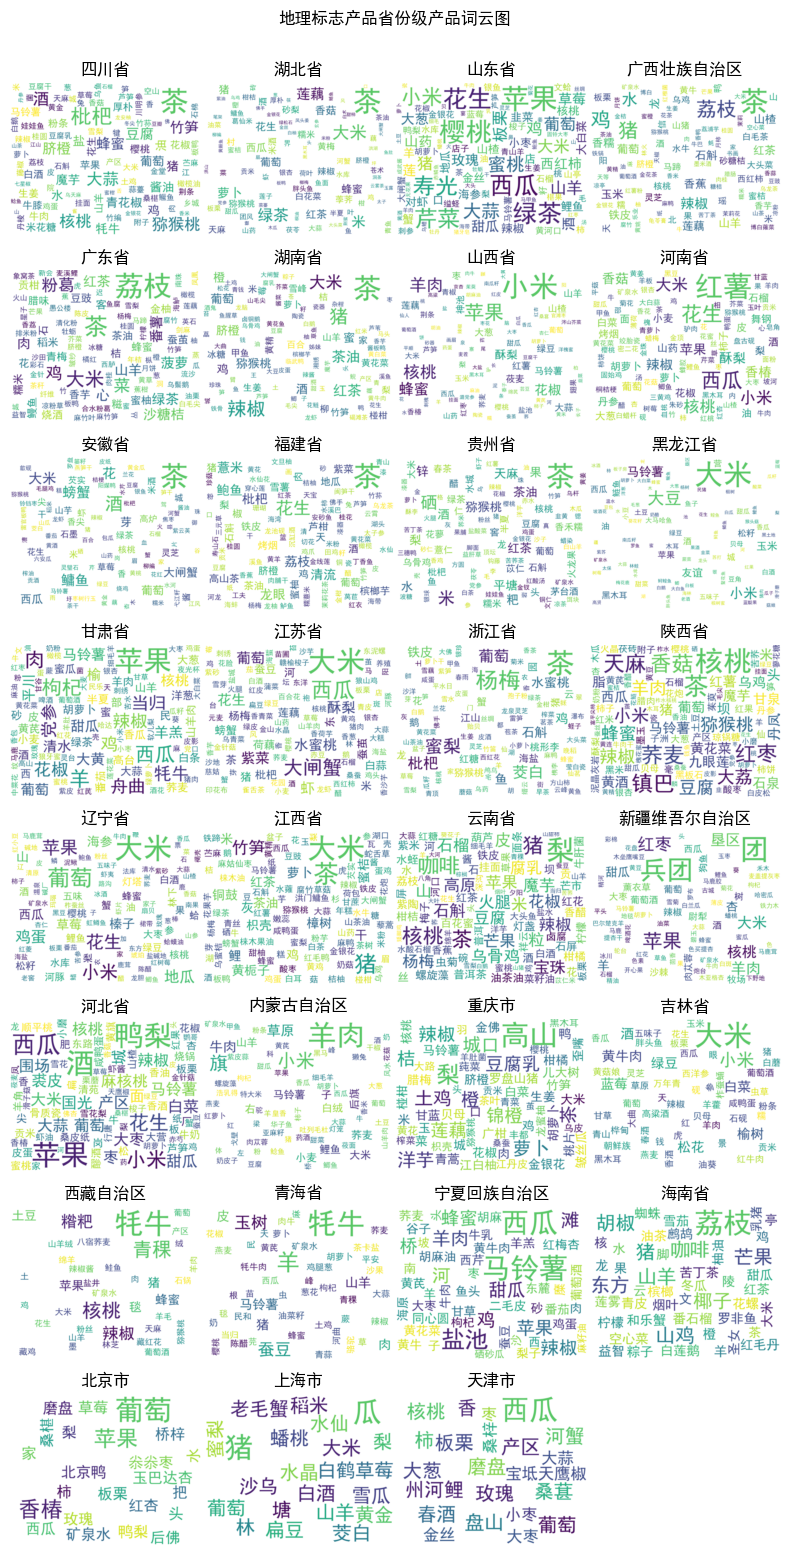

In [5]:
province_wordcloud_freq_dict = {
    province: counter_most_common_list_to_dict(
        product_name_NN_token_count_province_level(products, province), scale="square"
    )
    for province, _ in province_products_count
}

freq_dict_wordcloud(
    province_wordcloud_freq_dict,
    sup_title="地理标志产品省份级产品词云图",
    save_path=os.path.join(figures_save_dir, "地理标志产品省份级产品词云图.png"),
)


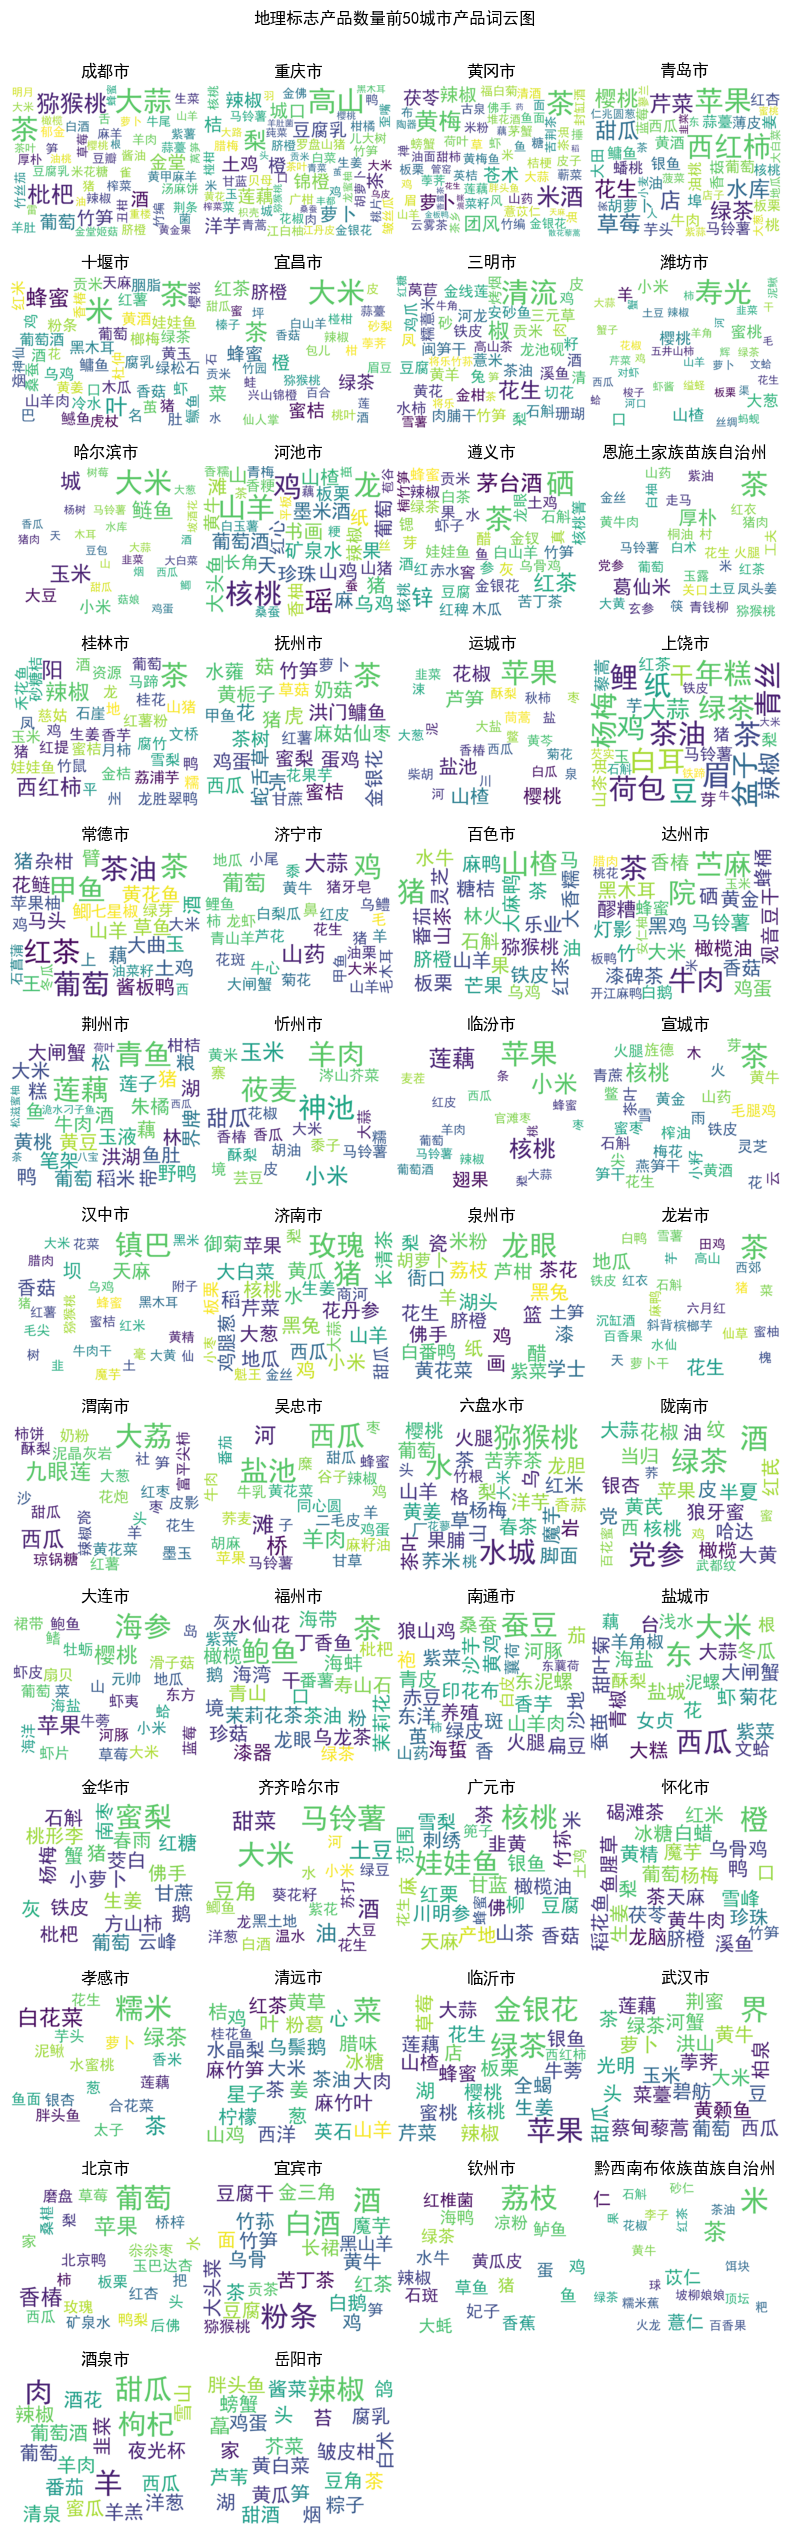

In [6]:
from matplotlib.pyplot import sca


rank = 50

city_wordcloud_freq_dict = {
    city: counter_most_common_list_to_dict(
        product_name_NN_token_count_city_level(products, city), scale="square"
    )
    for city, _ in city_products_count[:rank]
}

freq_dict_wordcloud(
    city_wordcloud_freq_dict,
    sup_title=f"地理标志产品数量前{rank}城市产品词云图",
    save_path=os.path.join(figures_save_dir, f"地理标志产品数量前{rank}城市产品词云图.png"),
)